# Multiple Linear Regression

#### Name:Jami Devi
#### RegNo:22B05A1208

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns            # for visualiztions
import pandas as pd
from sklearn.linear_model import LinearRegression  #Linear Regression is the model on which we have to work 
from sklearn.metrics import r2_score  #for calculating accuracy
from sklearn.model_selection import train_test_split  #to split the dataset into training and testing datasets

import warnings     #to ignore any warning during execution
warnings.filterwarnings("ignore")

## Importing the dataset

In [4]:
data =pd.read_csv('50_Startups.csv')
X=data.iloc[:,:-1]
y=data.iloc[:,4]

In [5]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


## Encoding categorical data

In [6]:
# Convert the column into categorical columns
states=pd.get_dummies(X['State'],drop_first=True)
states

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [7]:
# Drop the state column
X=X.drop('State',axis=1)

#concat the dummy variables
X=pd.concat([X,states],axis=1)

## Splitting the dataset into the Training set and Test set

In [8]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Fitting Multiple Linear Regression

In [9]:
#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [11]:
score =r2_score(y_test,y_pred)
score*100

93.47068473282422

## Visualization of Testing set

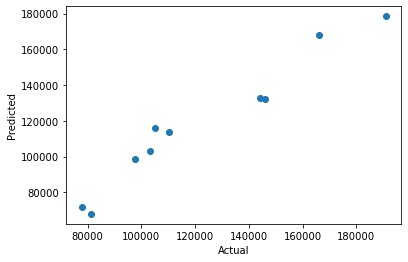

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

<AxesSubplot:xlabel='Profit'>

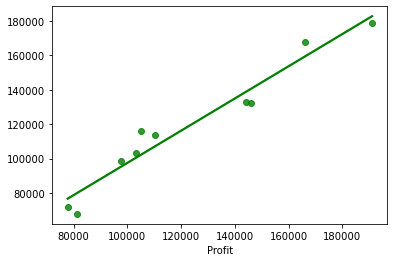

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

In [19]:
#predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696
